# What are Target Pixel Files?

Target Pixel Files (TPFs) contain the flux value for each pixel, for each time measurement. They can be thought of as stacks of images, with one image for every time stamp the telescope took data. Each time point is referred to as a **cadence** These images are cut out 'postage stamps' of the full image to make them easier to work with and smaller to downlink. 

TPFs are given in FITS files, which you can read more about [here](https://fits.gsfc.nasa.gov/fits_primer.html). `lightkurve` includes tools for you to work directly with these files easily and intuitively.

First, let's open a file.

In [1]:
from lightkurve import KeplerTargetPixelFile
tpf = KeplerTargetPixelFile('data/kplr006922244-2010078095331_lpd-targ.fits.gz')

We can access meta data using this object simply:

In [2]:
tpf.mission

'Kepler'

In [3]:
tpf.quarter

4

In [4]:
tpf.time

array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
       442.18306983, 442.2035041 ])

We've opened the fits file and created a new `KeplerTargetPixelFile` object called tpf. Let's take a look at the 'header' of the file, which contains information about the data set.

In [5]:
tpf.header()

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2015-09-23'         / file creation date.                            
CREATOR = '917482 TargetPixelExporterPipelineModule' / pipeline job and program 
PROCVER = 'svn+ssh://murzim/repo/soc/tags/release/9.3.25 r60410' / SW version   
FILEVER = '6.1     '           / file format version                            
TIMVERSN= 'OGIP/93-003'     

FITS headers contain lots of information about the telescope and observation. Some parts of this information we already know. For example we know that that *KEPLERID* is 6922244. Some of this information is based on the Kepler Input Catalog (KIC), such as the temperature, radius and color of the star. Most of the other information is about the telescope itself, such as the module number, and where it was pointing, such as the RA and Dec of the source.

FITS files usually have several extensions. The first extension stores general information in the header about the observation. The actual images from the telescope are in the second extention. This extension has it's own header too. Let's take a look at that now. 

(Note: Rather than print all the header, we are just printing the column names.)

In [6]:
tpf.header(ext=1)['TTYPE*']

TTYPE1  = 'TIME    '           / column title: data time stamps                 
TTYPE2  = 'TIMECORR'           / column title: barycenter - timeslice correction
TTYPE3  = 'CADENCENO'          / column title: unique cadence number            
TTYPE4  = 'RAW_CNTS'           / column title: raw pixel counts                 
TTYPE5  = 'FLUX    '           / column title: calibrated pixel flux            
TTYPE6  = 'FLUX_ERR'           / column title: 1-sigma calibrated uncertainty   
TTYPE7  = 'FLUX_BKG'           / column title: calibrated background flux       
TTYPE8  = 'FLUX_BKG_ERR'       / column title: 1-sigma cal. background uncertain
TTYPE9  = 'COSMIC_RAYS'        / column title: cosmic ray detections            
TTYPE10 = 'QUALITY '           / column title: pixel quality flags              
TTYPE11 = 'POS_CORR1'          / column title: column position correction       
TTYPE12 = 'POS_CORR2'          / column title: row position correction          
TTYPE13 = 'RB_LEVEL'        

It is the *TIME*, *FLUX* and *FLUX_ERR* columns that we are most interested in. You can access these with `tpf.time`, `tpf.flux` and `tpf.flux_err`. Let's look at the shape of the *FLUX* column. (You can use normal `numpy` methods on these to find the shape, mean etc!)

In [7]:
tpf.flux.shape

(4020, 5, 5)

The *FLUX* data is a 4028x5x5 array. (Note: `lightkurve` has trimmed out bad cadences for you, including safe modes, coarse points and thruster firings.) The first axis is the time axis, and the images themselves are 5 pixels by 5 pixels. You can use the `plot` method on the `KeplerTargetPixelFile` object to view the data. (This will show just one cadence of the data.)

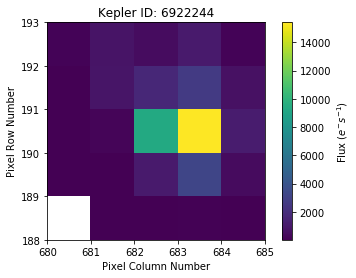

In [8]:
%matplotlib inline
tpf.plot();

There are one of these images for every Kepler cadence. Each of the pixels are 4 arcseconds ($4"$) across. The point spread function (PSF) of the telescope causes the light from the star fall onto several different pixels. This can be seen in the image above. Because of this, we have to sum up many pixels to collect all the light from the source. To do this we sum up all the pixels in an **aperture**. An aperture is a pixel mask, where we take only the pixels related to the target. 

The *Kepler* pipeline adds an aperture to each target pixel file. This aperture determines which pixels are summed to create a 1D light curve of the target. There are some science cases where you might want to create a different aperture. For example, there may be a nearby contaminant or you may want to measure the background. 

The standard pipeline aperture is easily accessed using '`tpf.pipeline_mask`:

In [9]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

We can also plot this aperture over the target pixel file above to see if the flux of the star is all contained within the aperture.

(<matplotlib.figure.Figure at 0x117b73cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x117bde048>)

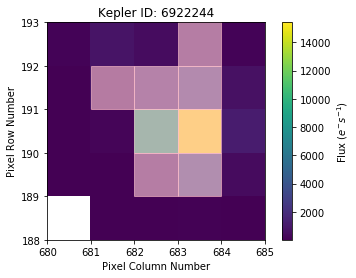

In [10]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

Now that we have the aperture we can create a Simple Aperture Photometry light curve in the next tutorial.